In [1]:
import os 
import sys 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(repo_root)

from src.utils.c_operation_helpers import  run_simulation_convergence

In [2]:
DATASET_PATH = os.path.join(repo_root, 'datasets')

In [3]:

def average_convergence (filein_idx, filein_data, is_synthetic, T):
    
    ho = []
    z = []
    bin = []
    binz = []

    for t in range(0, T):
        results_dict = run_simulation_convergence(filein_idx, filein_data, is_synthetic)
        ho.append(len(results_dict['HO']['rms_convergence_criteria']))
        z.append(len(results_dict['Z']['rms_convergence_criteria']))
        bin.append(len(results_dict['BIN']['rms_convergence_criteria']))
        binz.append(len(results_dict['BINZ']['rms_convergence_criteria']))
        
    print("============== Iterations until convergence ==============")
    print(f" Ours- Higher Order: { np.mean(ho)}")
    print(f" Zermello- Higher Order: { np.mean(z)}")
    print(f" Ours- binary: { np.mean(bin)}")
    print(f" Zermello- bin: { np.mean(binz)}")
        

def plot_convergence(convergence_results_dict):
    # Iterate through each category in the dictionary
    plt.figure(figsize=(10, 6))
   
    plt.loglog(convergence_results_dict['HO']['rms_convergence_criteria'][:1000], label='Ours-Higher Order')
    plt.loglog(convergence_results_dict['Z']['rms_convergence_criteria'][:1000], label='Zermello-Higher Order')
    plt.loglog(convergence_results_dict['BIN']['rms_convergence_criteria'][:1000], label='Ours-Binary Projection')
    plt.loglog(convergence_results_dict['BINZ']['rms_convergence_criteria'][:1000], label='Zermello-Binary Projection')

    plt.xlabel("Iterations")
    plt.ylabel("RMS Error")
    plt.title(f"Iterations until convergence")
    plt.legend(loc="best")
    
    plt.show()






## Synthetic

#### N-1000, M-1000, K-4, L-0

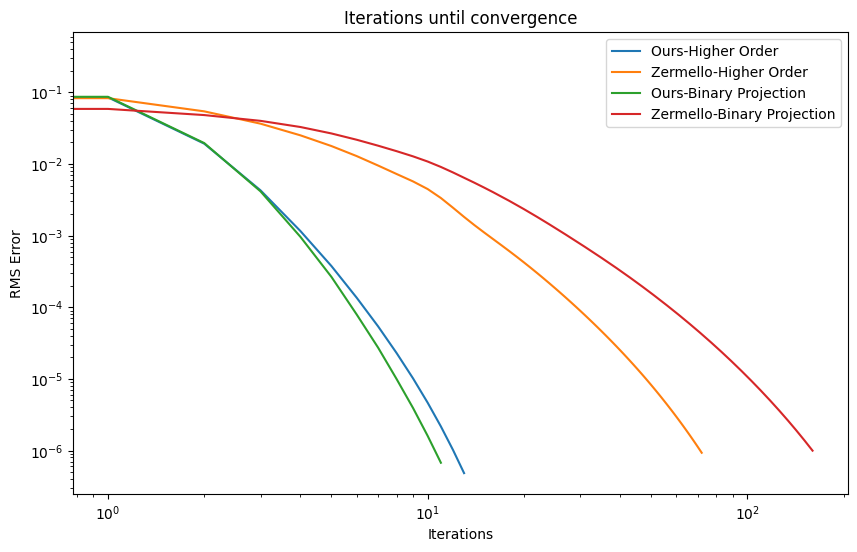

In [4]:
filein_idx = os.path.join(DATASET_PATH, 'Synthetic_Data/N-1000_M-1000_K-4_L-0_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Synthetic_Data/N-1000_M-1000_K-4_L-0_edges.txt')

result = run_simulation_convergence(filein_idx, filein_data, is_synthetic=1)
plot_convergence(result)

#### N-1000, M-10000, K-10, L-1 

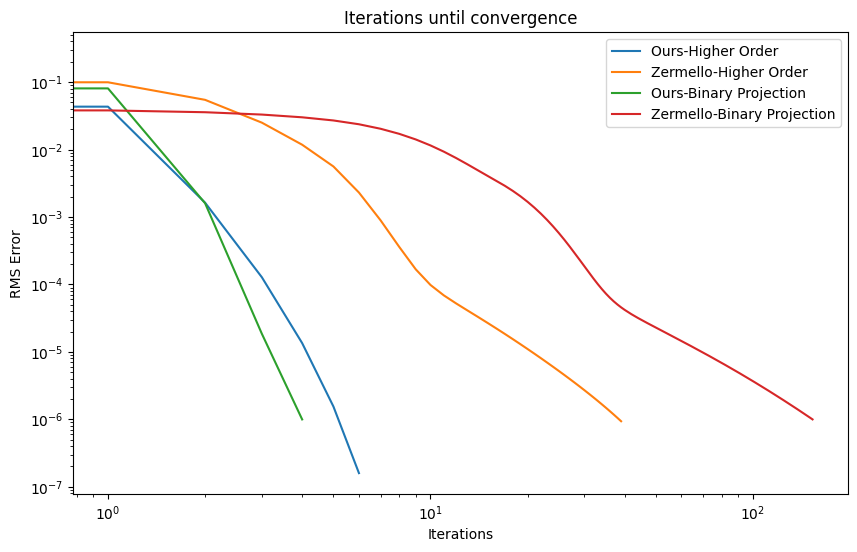

In [5]:
filein_idx = os.path.join(DATASET_PATH, 'Synthetic_Data/N-1000_M-100000_K-8_L-1_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Synthetic_Data/N-1000_M-100000_K-8_L-1_edges.txt')

result = run_simulation_convergence(filein_idx, filein_data, is_synthetic=1)
plot_convergence(result)

## Real

### UCL 

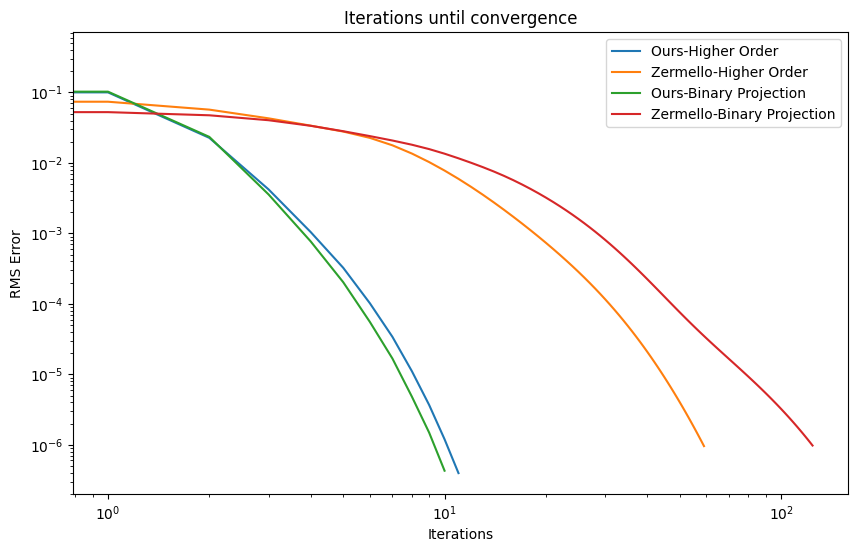

In [6]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00102_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00102_edges.txt')


T = 1000
ratio = 0.8

data_cl = run_simulation_convergence(filein_idx, filein_data, is_synthetic=0)
plot_convergence(data_cl)


In [7]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00102_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00102_edges.txt')

T = 20
average_convergence(filein_idx, filein_data, 0, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 11.7
 Zermello- Higher Order: 59.25
 Ours- binary: 10.85
 Zermello- bin: 123.45


#### Authorship

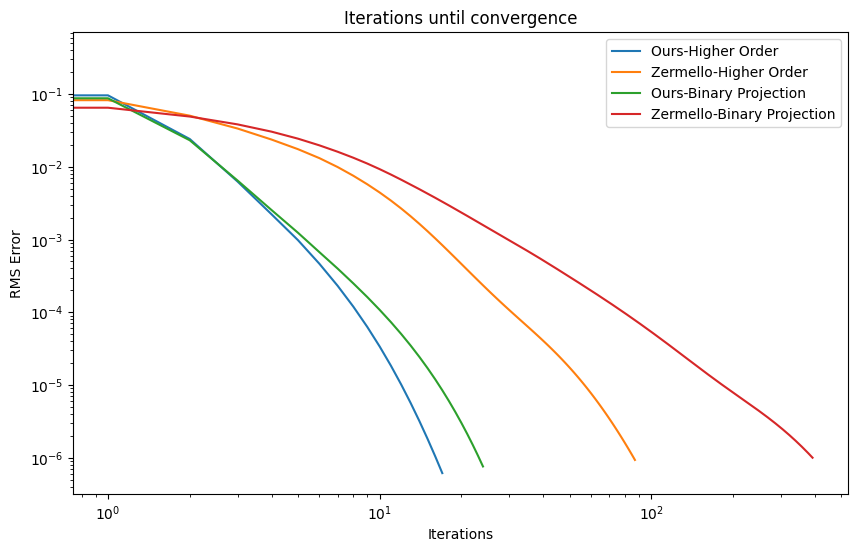

In [8]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00104_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00104_edges.txt')

result = run_simulation_convergence(filein_idx, filein_data, is_synthetic=0)
plot_convergence(result)

In [9]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00104_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00104_edges.txt')

T = 20
average_convergence(filein_idx, filein_data, 0, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 17.2
 Zermello- Higher Order: 86.55
 Ours- binary: 23.4
 Zermello- bin: 372.15


#### AGH Course Selection

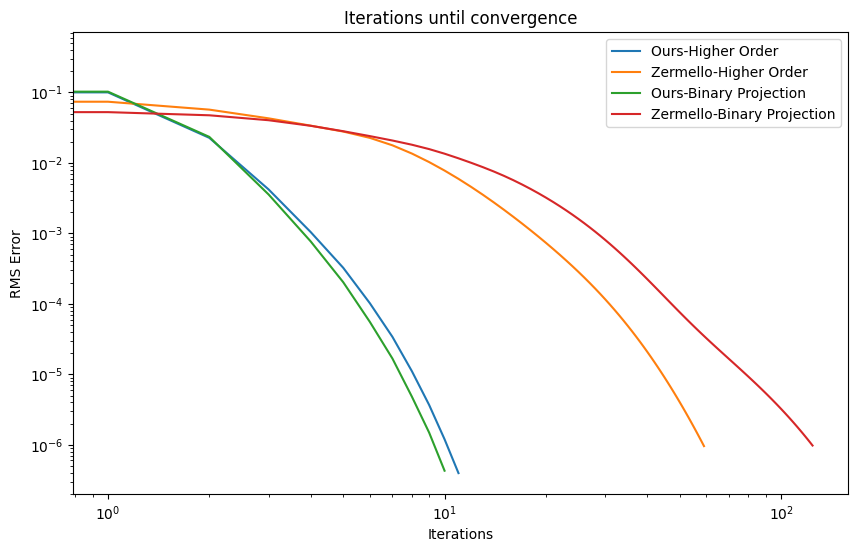

In [10]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00009_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00009_edges.txt')

result = run_simulation_convergence (filein_idx, filein_data, is_synthetic=0)
plot_convergence(data_cl)

In [11]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00009_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00009_edges.txt')
T = 20
average_convergence(filein_idx, filein_data, 0, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 6.8
 Zermello- Higher Order: 601.65
 Ours- binary: 7.2
 Zermello- bin: 2993.5


#### Wolf (Binary)

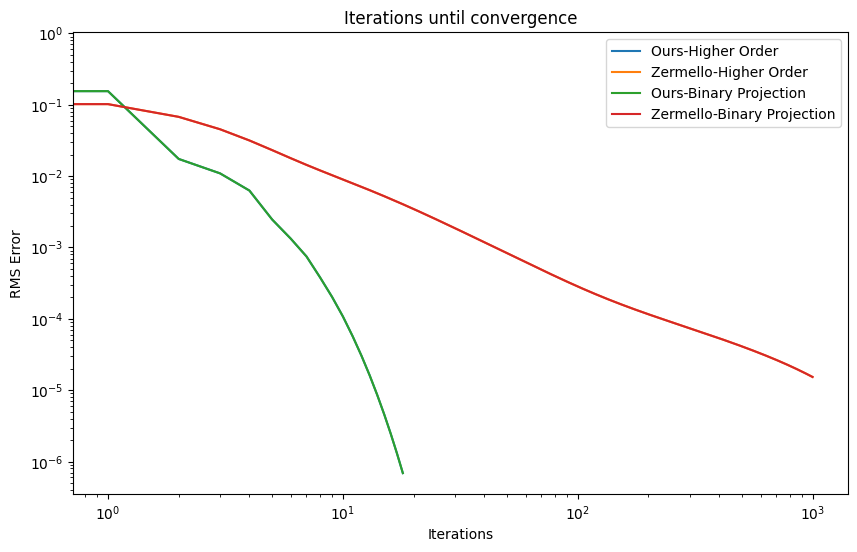

In [12]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00105_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00105_edges.txt')

data_cl = run_simulation_convergence (filein_idx, filein_data, is_synthetic=0)
plot_convergence(data_cl)

In [13]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00105_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00105_edges.txt')

T = 20
average_convergence(filein_idx, filein_data, 0, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 19.0
 Zermello- Higher Order: 2771.05
 Ours- binary: 19.0
 Zermello- bin: 2771.05


#### Horse Racing

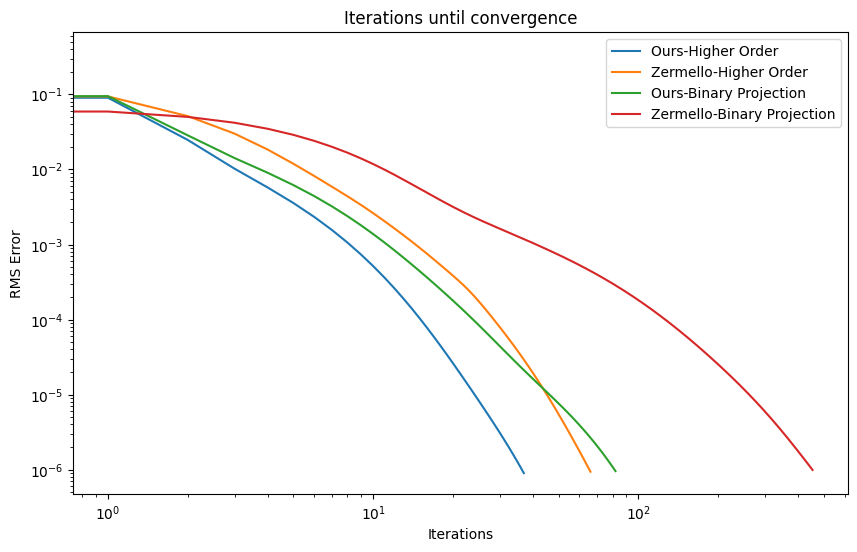

In [14]:
filein_idx = os.path.join(DATASET_PATH, 'Real_Data/00101_nodes.txt')
filein_data = os.path.join(DATASET_PATH, 'Real_Data/00101_edges.txt')

data_cl = run_simulation_convergence(filein_idx, filein_data, is_synthetic=0)
plot_convergence(data_cl)